In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2022-02-05 16:56:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.08s   

2022-02-05 16:57:00 (2.03 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [5]:
# Import with pandas
import pandas as pd 
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # prase the date column and tell pandas column 1 is a datetime 

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [7]:
df.tail()


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [9]:
# How many samples do we have?
len(df)

2787

In [10]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


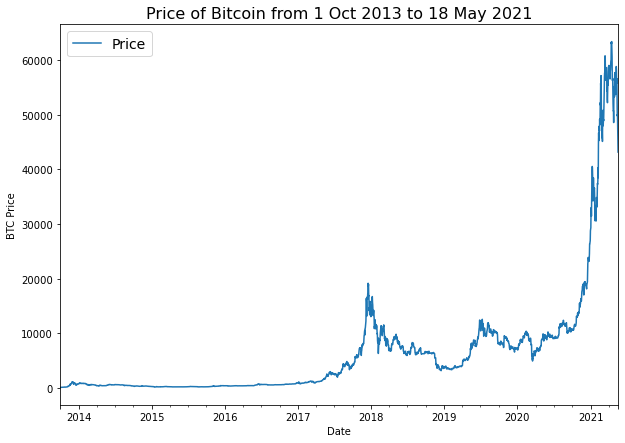

In [11]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

# Importing time series data with Python's CSV module


In [56]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

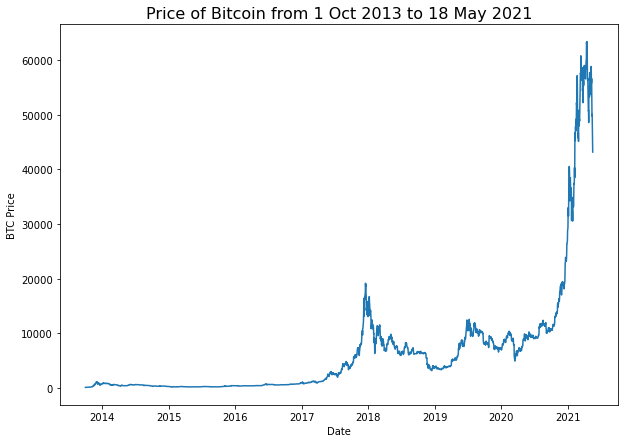

In [57]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date");

# Format date 1: Create train and test sets of our time series data


In [58]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [59]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

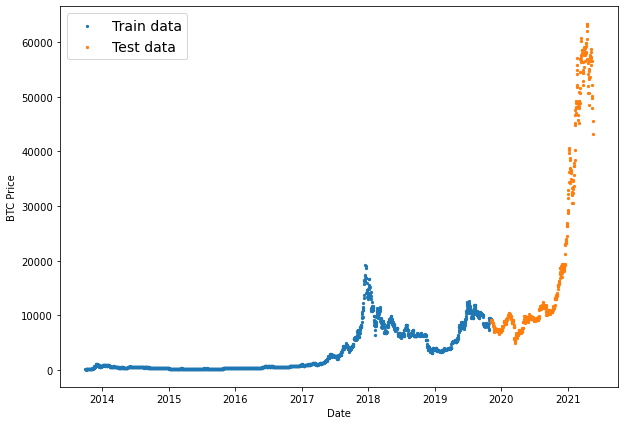

In [14]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


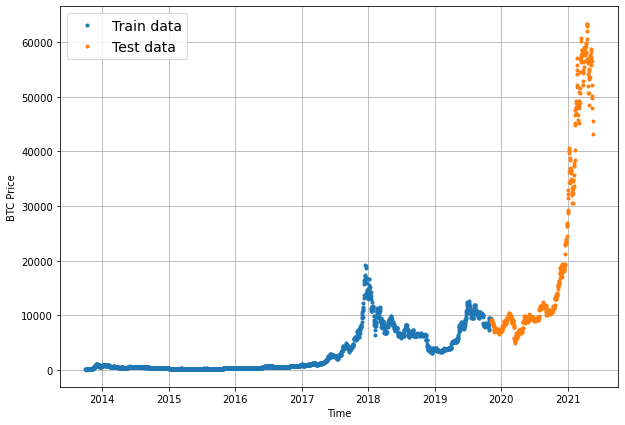

In [16]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [17]:
y_test[:10]


array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [28]:
# Create a naive forecast 
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

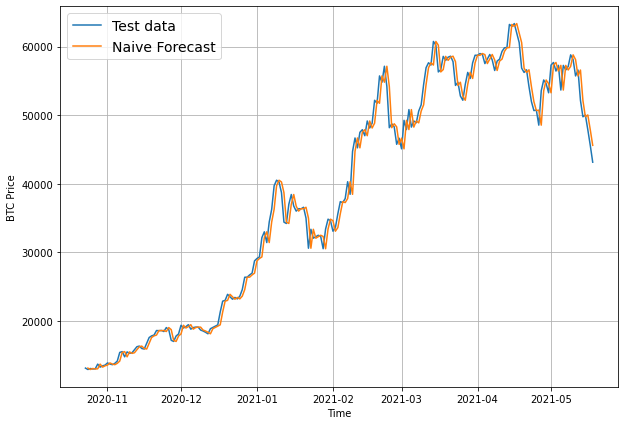

In [29]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

In [32]:
import tensorflow as tf


In [33]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [35]:
#Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182626

In [36]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [37]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [38]:
naive_forecast[-10:]


array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [40]:
tf.reduce_mean(y_test)


<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [42]:
tf.reduce_min(y_test), tf.reduce_max(y_test)


(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

# Format Data Part 2: Windowing our dataset

We window our time series dataset to turn our data into a supervised learning problem.
```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]


In [61]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [62]:
# setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [64]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [65]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")


Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite lsow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html

```
Our function will:

1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon
```


In [66]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels


In [68]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [69]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


# Turning windows into training and test sets


In [70]:
full_windows[:5], full_labels[:5]


(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [71]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [72]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [73]:
train_windows[:5], train_labels[:5]


(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [74]:
test_windows[:5], test_labels[:5]


(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [75]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

# Make a modelling checkpoint callback
Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.



In [76]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

# Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:

- A single dense layer with 128 hidden units and ReLU
- An output layer with linear activation (no activation)
- Adam optimizaiton and MAE loss function
- Batch size of 128 (previously we've used 32)
- 100 epochs


* *Hyperparameters* = values a machine learning practitioner can adjust themselves
* **Parameters** = values a model learns on its own


In [77]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation               
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 780.3469 - mae: 780.3469 - mse: 2312739.0000 - val_loss: 2279.5830 - val_mae: 2279.5830 - val_mse: 12772095.0000
Epoch 2/100
18/18 [==============================] - 0s 20ms/step - loss: 247.6765 - mae: 247.6765 - mse: 285481.0000 - val_loss: 1005.9865 - val_mae: 1005.9865 - val_mse: 3441759.5000
Epoch 3/100
18/18 [==============================] - 0s 21ms/step - loss: 188.4107 - mae: 188.4107 - mse: 171890.0469 - val_loss: 923.2859 - val_mae: 923.2859 - val_mse: 2868195.0000
Epoch 4/100
18/18 [==============================] - 0s 20ms/step - loss: 169.4334 - mae: 169.4334 - mse: 151699.4375 - val_loss: 900.5931 - val_mae: 900.5931 - val_mse: 2683713.5000
Epoch 5/100
18/18 [==============================] - 0s 20ms/step - loss: 165.0900 - mae: 165.0900 - mse: 145490.8906 - val_loss: 895.2404 - val_mae: 895.2404 - val_mse: 2564606.0000
Epoch 6/100
18/18 [==============================] - 0s 21ms/step - loss: 158.5

18/18 [==============================] - 0s 29ms/step - loss: 114.0328 - mae: 114.0328 - mse: 77953.4609 - val_loss: 610.3880 - val_mae: 610.3880 - val_mse: 1316937.2500
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 113.4892 - mae: 113.4892 - mse: 78513.0938 - val_loss: 617.2402 - val_mae: 617.2402 - val_mse: 1304227.6250
Epoch 30/100
18/18 [==============================] - 0s 20ms/step - loss: 116.4094 - mae: 116.4094 - mse: 78943.1484 - val_loss: 603.6489 - val_mae: 603.6489 - val_mse: 1283177.8750
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 112.3454 - mae: 112.3454 - mse: 74879.3281 - val_loss: 623.4432 - val_mae: 623.4432 - val_mse: 1311037.0000
Epoch 32/100
18/18 [==============================] - 0s 20ms/step - loss: 113.2056 - mae: 113.2056 - mse: 77898.5078 - val_loss: 600.0259 - val_mae: 600.0259 - val_mse: 1271945.3750
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 112.9529 - mae: 112.9529 -

18/18 [==============================] - 0s 2ms/step - loss: 111.8451 - mae: 111.8451 - mse: 73612.9531 - val_loss: 654.6138 - val_mae: 654.6138 - val_mse: 1348993.3750
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 110.3121 - mae: 110.3121 - mse: 72546.6719 - val_loss: 610.7808 - val_mae: 610.7808 - val_mse: 1251884.8750
Epoch 65/100
18/18 [==============================] - 0s 20ms/step - loss: 109.7098 - mae: 109.7098 - mse: 72575.0938 - val_loss: 573.9961 - val_mae: 573.9961 - val_mse: 1190387.8750
Epoch 66/100
18/18 [==============================] - 0s 21ms/step - loss: 106.8139 - mae: 106.8139 - mse: 70554.2734 - val_loss: 572.9990 - val_mae: 572.9990 - val_mse: 1187547.6250
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 106.1394 - mae: 106.1394 - mse: 70026.4297 - val_loss: 602.1526 - val_mae: 602.1526 - val_mse: 1255793.7500
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 112.9245 - mae: 112.9245 - 

In [79]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 812us/step - loss: 662.5316 - mae: 662.5316 - mse: 1358190.5000


[662.5316162109375, 662.5316162109375, 1358190.5]

In [80]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 925us/step - loss: 568.5498 - mae: 568.5498 - mse: 1172587.6250


[568.5498046875, 568.5498046875, 1172587.625]

# Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's predict() method
4. Returns the predictions


In [81]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [83]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8874.493, 8789.944, 9040.987, 8804.829, 8741.212, 8749.836,
        8705.867, 8513.171, 8478.415, 8536.302], dtype=float32)>)

In [84]:
tf.squeeze(test_labels).shape, model_1_preds.shape


(TensorShape([556]), TensorShape([556]))

In [85]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.5499,
 'mse': 1172587.9,
 'rmse': 1082.861,
 'mape': 2.5492291,
 'mase': 0.9987847}

In [86]:
naive_results


{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [87]:
test_labels.shape


(556, 1)

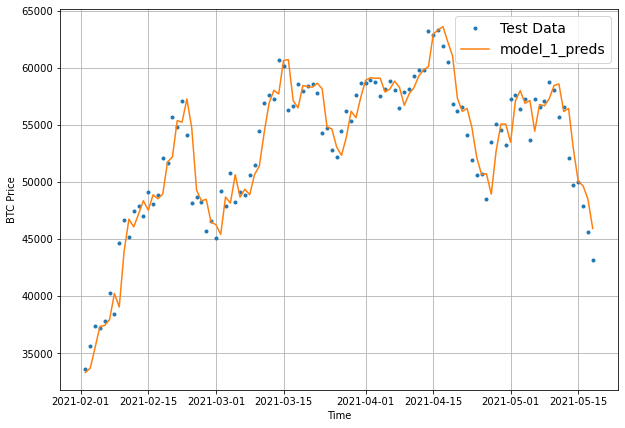

In [88]:
#plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

# Model 2: Dense (window = 30, horizon = 1)


In [92]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [95]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [94]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [96]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [97]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 779us/step - loss: 658.0291


658.029052734375

In [98]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 865us/step - loss: 608.8481


608.8480834960938

In [103]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [104]:
tf.squeeze(test_labels).shape, model_2_preds.shape


(TensorShape([552]), TensorShape([552]))

In [105]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 608.848,
 'mse': 1284314.4,
 'rmse': 1133.276,
 'mape': 2.768066,
 'mase': 1.0642723}

In [102]:
model_1_results


{'mae': 568.5499,
 'mse': 1172587.9,
 'rmse': 1082.861,
 'mape': 2.5492291,
 'mase': 0.9987847}

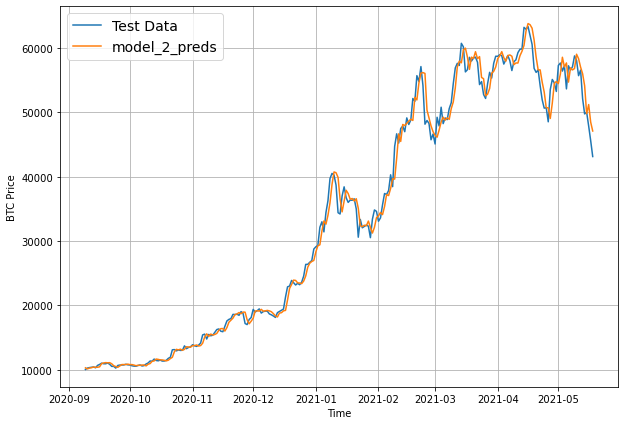

In [107]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

# Model 3: Dense (window = 30, horizon = 7)


In [108]:
prices[:10]


array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [109]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [110]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2200, 551, 2200, 551)

In [111]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [112]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 900us/step - loss: 1317.8018


1317.8017578125

In [113]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 870us/step - loss: 1228.5236


1228.5235595703125

In [114]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9301.03 , 9255.057, 9386.084, 9463.899, 9428.424, 9450.685,
        9256.156],
       [8981.781, 8991.779, 9133.913, 9049.854, 9020.026, 9039.194,
        9031.239],
       [8911.586, 8944.726, 9021.002, 8950.288, 8948.543, 8886.974,
        8928.808],
       [9115.924, 8980.253, 8986.703, 9148.485, 9010.879, 9093.613,
        8975.999],
       [9021.95 , 8929.939, 8846.618, 9016.343, 9156.252, 9137.509,
        8853.586]], dtype=float32)>

In [115]:
model_2_results


{'mae': 608.848,
 'mse': 1284314.4,
 'rmse': 1133.276,
 'mape': 2.768066,
 'mase': 1.0642723}

In [116]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape


(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

In [117]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  569.8329  ,   309.68735 ,   285.87402 ,   417.95633 ,
          440.2518  ,   532.69415 ,   539.9028  ,   458.60135 ,
          513.77826 ,   634.0573  ,   804.88763 ,   734.7355  ,
          678.25916 ,   792.92694 ,   567.4803  ,   276.1914  ,
          235.29234 ,   244.68924 ,   286.03802 ,   284.581   ,
          134.6077  ,   155.0277  ,   221.26717 ,   278.0025  ,
          175.6605  ,   155.22754 ,    91.86879 ,    98.08378 ,
          122.0097  ,   162.57045 ,   289.1723  ,   390.6123  ,
          290.6882  ,   282.27972 ,   280.6268  ,   257.2563  ,
          327.1397  ,   249.74352 ,   250.42424 ,   255.33469 ,
          410.17355 ,   135.01945 ,   104.09745 ,    84.98556 ,
          113.40995 ,    92.47168 ,    69.050224,    83.27602 ,
           85.60456 ,    91.71575 ,   127.40172 ,   137.71834 ,
          193.87074 ,   160.65457 ,   253.00285 ,   390.39877 ,
          549.7675  ,   535.5915  ,   529.62646 ,   518.6678  ,
          424.58057 ,   249.47092

# Make our evaluation function work for larger horizons


In [118]:
model_3.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 1ms/step - loss: 1228.5236


1228.5235595703125

In [119]:
tf.reduce_mean(model_3_results["mae"]).numpy()


1228.5237

In [120]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [121]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1228.5237,
 'mse': 5328784.0,
 'rmse': 1413.747,
 'mape': 5.4774456,
 'mase': 2.186089}

In [122]:
model_3_preds[:5]


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9301.03 , 9255.057, 9386.084, 9463.899, 9428.424, 9450.685,
        9256.156],
       [8981.781, 8991.779, 9133.913, 9049.854, 9020.026, 9039.194,
        9031.239],
       [8911.586, 8944.726, 9021.002, 8950.288, 8948.543, 8886.974,
        8928.808],
       [9115.924, 8980.253, 8986.703, 9148.485, 9010.879, 9093.613,
        8975.999],
       [9021.95 , 8929.939, 8846.618, 9016.343, 9156.252, 9137.509,
        8853.586]], dtype=float32)>

In [123]:
test_labels[:]


array([[ 8794.35864452,  8798.04205463,  9081.18687849, ...,
         8760.89271814,  8749.52059102,  8656.97092235],
       [ 8798.04205463,  9081.18687849,  8711.53433917, ...,
         8749.52059102,  8656.97092235,  8500.64355816],
       [ 9081.18687849,  8711.53433917,  8760.89271814, ...,
         8656.97092235,  8500.64355816,  8469.2608989 ],
       ...,
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361],
       [56573.5554719 , 52147.82118698, 49764.1320816 , ...,
        47885.62525472, 45604.61575361, 43144.47129086]])

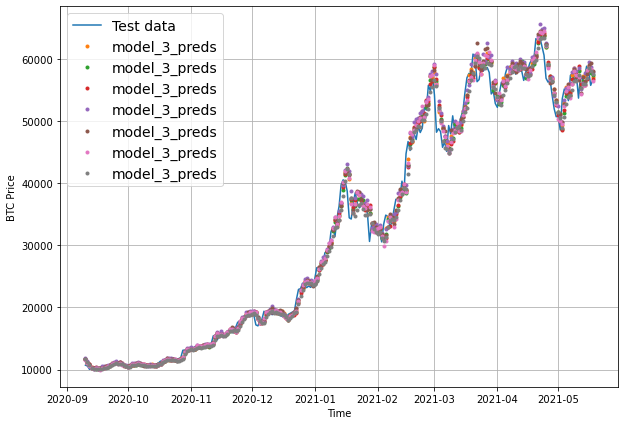

In [124]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")


In [126]:
model_3_preds[0]


<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9301.03 , 9255.057, 9386.084, 9463.899, 9428.424, 9450.685,
       9256.156], dtype=float32)>

In [127]:
tf.reduce_mean(model_3_preds[0])


<tf.Tensor: shape=(), dtype=float32, numpy=9363.048>

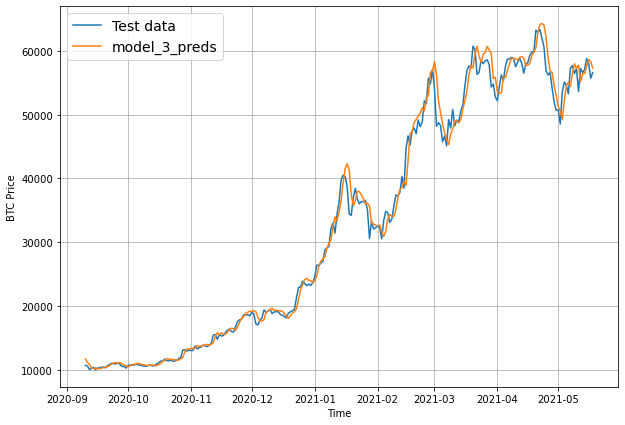

In [129]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

# Which of our models is performing the best so far?


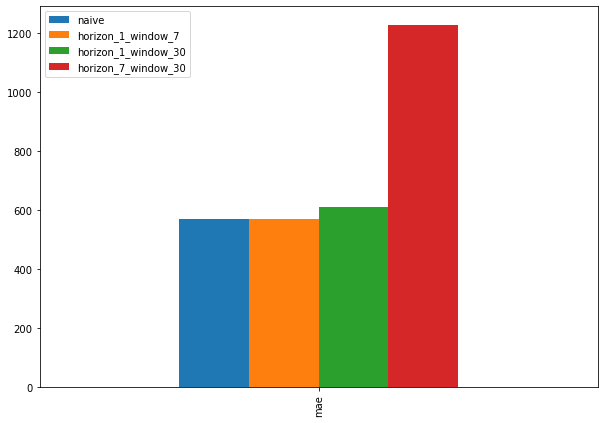

In [130]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

# Model 4: Conv1D


In [131]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data


In [132]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [133]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [134]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

To use the Conv1D layer, we need an input shape of: (batch_size, timesteps, input_dim)...



In [135]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [136]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [137]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`


In [138]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")


Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [139]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)                      
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


Epoch 1/100
18/18 [==============================] - 1s 42ms/step - loss: 1207.3885 - val_loss: 2320.5461
Epoch 2/100
18/18 [==============================] - 1s 32ms/step - loss: 316.2140 - val_loss: 1467.3309
Epoch 3/100
18/18 [==============================] - 1s 53ms/step - loss: 192.6845 - val_loss: 1164.7460
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 177.3536 - val_loss: 981.6826
Epoch 5/100
18/18 [==============================] - 1s 32ms/step - loss: 172.3469 - val_loss: 960.8795
Epoch 6/100
18/18 [==============================] - 1s 33ms/step - loss: 171.9751 - val_loss: 950.1938
Epoch 7/100
18/18 [==============================] - 1s 34ms/step - loss: 167.1943 - val_loss: 943.3042
Epoch 8/100
18/18 [==============================] - 1s 32ms/step - loss: 163.5994 - val_loss: 905.5258
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 162.5452 - val_loss: 929.7834
Epoch 10/100
18/18 [==============================] - 1s 32ms

Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 112.1102 - val_loss: 601.0756
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 111.7129 - val_loss: 642.4762
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 117.4614 - val_loss: 628.8829
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 114.9637 - val_loss: 626.2316
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 113.7044 - val_loss: 601.3557
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 110.2300 - val_loss: 602.2665
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 110.8421 - val_loss: 601.6513
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 111.1995 - val_loss: 679.1378
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 110.6627 - val_loss: 607.0562
Epoch 49/100
18/18 [==============================] - 0s 3ms/ste

In [140]:
model_4.summary()


Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [141]:
# Evaluate model... 
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 803us/step - loss: 624.1891


624.1891479492188

In [142]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 902us/step - loss: 569.0327


569.03271484375

In [143]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8847.292, 8757.502, 8997.47 , 8762.801, 8707.723, 8713.594,
       8664.936, 8496.83 , 8439.471, 8499.395], dtype=float32)>

In [144]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 569.0327,
 'mse': 1169841.4,
 'rmse': 1081.592,
 'mape': 2.5515258,
 'mase': 0.9996329}

# Model 5: RNN (LSTM)
build an RNN model for our time series data.



In [145]:
train_windows[:5]


array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [146]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 17s - loss: 3296.9268INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 114ms/step - loss: 2323.6123 - val_loss: 9225.3408
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1128.3745INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 695.5120 - val_loss: 1486.2129
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 205.3295INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 237.3842 - val_loss: 1298.9415
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 236.3004INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 181.9194 - val_loss: 966.6409
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 173.4038 - val_loss: 970.9379
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 130.0101INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 111ms/step - loss: 172.5394 - val_loss: 950.2663
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 203.8978INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 127ms/step - loss: 164.7403 - val_loss: 942.9252
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 161.1051 - val_loss: 960.0074
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 167.7182 - val_loss: 966.1076
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 183.9302INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 166.5918 - val_loss: 941.1720
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 185.6165INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 165.4972 - val_loss: 910.0938
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 155.6759INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 111ms/step - loss: 168.2307 - val_loss: 908.8241
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 129.8007INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 92ms/step - loss: 163.1460 - val_loss: 904.5107
Epoch 14/100
18/18 [==============================] - 0s 4ms/step - loss: 160.9698 - val_loss: 950.6884
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 159.8478 - val_loss: 920.4718
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 152.0473INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 157.2978 - val_loss: 875.0002
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 155.9802 - val_loss: 951.8661
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 156.0359 - val_loss: 934.3552
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 153.0184 - val_loss: 916.2113
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 164.6084INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 152.5818 - val_loss: 848.9067
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 204.6924INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 84ms/step - loss: 149.7100 - val_loss: 842.0667
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 198.6530INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 85ms/step - loss: 147.9787 - val_loss: 836.0007
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 147.4627 - val_loss: 872.2417
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 163.3091INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 145.0571 - val_loss: 823.6965
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 145.8550INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 143.1426 - val_loss: 813.3412
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 141.8162INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 90ms/step - loss: 142.6981 - val_loss: 797.6092
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 203.7954INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 141.1963 - val_loss: 791.5555
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 137.7104INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 86ms/step - loss: 139.3711 - val_loss: 772.4111
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 138.6781 - val_loss: 780.4946
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 141.2169 - val_loss: 784.2933
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 160.1815INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 88ms/step - loss: 136.3261 - val_loss: 758.0807
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 114.0342INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 85ms/step - loss: 133.6249 - val_loss: 754.8785
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 134.4763 - val_loss: 762.5099
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 140.3933INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 134.2352 - val_loss: 730.2791
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 131.0167 - val_loss: 740.7139
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 167.4975INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 83ms/step - loss: 132.1650 - val_loss: 721.4099
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 129.1034 - val_loss: 730.2093
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 126.4554INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 84ms/step - loss: 127.8960 - val_loss: 709.1478
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 134.3907INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 127.1242 - val_loss: 709.0053
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 128.0501 - val_loss: 728.2664
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 122.0965INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 88ms/step - loss: 126.3814 - val_loss: 690.3583
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 123.2465INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 81ms/step - loss: 124.6635 - val_loss: 687.2236
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 124.3902 - val_loss: 687.5544
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 69.4842INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 123.8424 - val_loss: 679.5863
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 85.0500INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 82ms/step - loss: 121.7773 - val_loss: 673.2306
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 98.0423INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 87ms/step - loss: 122.8854 - val_loss: 669.4606
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 122.0974 - val_loss: 676.2073
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 103.5492INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 121.5777 - val_loss: 666.9909
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 121.4749 - val_loss: 678.8609
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 123.1036 - val_loss: 696.4199
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 121.6399 - val_loss: 736.8032
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 124.8216INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 83ms/step - loss: 121.3310 - val_loss: 650.5843
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 66.2174INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 84ms/step - loss: 118.9706 - val_loss: 647.5685
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 118.9036 - val_loss: 650.0685
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 134.6407INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 118.2978 - val_loss: 644.0104
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 115.8735INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 82ms/step - loss: 119.8718 - val_loss: 641.1170
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 122.4150 - val_loss: 656.0629
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 117.5513 - val_loss: 643.0304
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 91.0483INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 82ms/step - loss: 116.8442 - val_loss: 635.4683
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 92.3454INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 117.1364 - val_loss: 633.3264
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 116.8343 - val_loss: 658.5167
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 118.0427 - val_loss: 681.5118
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 112.5032INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 84ms/step - loss: 120.1888 - val_loss: 630.7100
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1121 - val_loss: 664.8985
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 133.1550INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 82ms/step - loss: 117.7560 - val_loss: 624.2289
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 115.0426 - val_loss: 629.7158
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 96.3074INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 115.1058 - val_loss: 621.2209
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 116.1991 - val_loss: 624.7411
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 119.2092 - val_loss: 625.6478
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 116.3835INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 83ms/step - loss: 114.8228 - val_loss: 617.9867
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 114.7373 - val_loss: 640.8293
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 117.4161 - val_loss: 623.2407
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 114.3949 - val_loss: 618.9725
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 114.9830 - val_loss: 623.1981
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 115.4746 - val_loss: 651.6793
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5870 - val_loss: 622.1879
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 117.8904 - val_loss: 696.9327
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 117.5555 - val_loss: 636.0430
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 116.78

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 82ms/step - loss: 113.8087 - val_loss: 608.5422
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5797 - val_loss: 621.0977
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 113.1426 - val_loss: 626.9290
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 115.9727 - val_loss: 616.8391
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 112.7026 - val_loss: 641.7614
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1325 - val_loss: 618.0204
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 113.0278 - val_loss: 632.8408
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1905 - val_loss: 615.2250
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 129.5040INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 113.5646 - val_loss: 601.2283
Epoch 88/100
 1/18 [>.............................] - ETA: 0s - loss: 132.8663INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 85ms/step - loss: 111.4224 - val_loss: 600.0906
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7951 - val_loss: 629.4604
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 116.6288 - val_loss: 651.5785
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 116.5524 - val_loss: 660.2038
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 113.2913 - val_loss: 612.8088
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 113.6792 - val_loss: 603.2243
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 142.8171INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 1s 87ms/step - loss: 110.7081 - val_loss: 596.3182
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 138.6228INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 110.7582 - val_loss: 596.2634
Epoch 96/100
 1/18 [>.............................] - ETA: 0s - loss: 117.3358INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 89ms/step - loss: 110.8605 - val_loss: 595.2665
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7317 - val_loss: 660.3106
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0941 - val_loss: 597.4309
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 156.7810INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 111.2170 - val_loss: 593.5316
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6235 - val_loss: 597.8981


In [147]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 593.5316


593.5316162109375

In [148]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8972.073, 8806.204, 8995.008, 8832.137, 8727.224], dtype=float32)>

In [149]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 593.5316,
 'mse': 1264156.5,
 'rmse': 1124.3472,
 'mape': 2.6651978,
 'mase': 1.0426706}

In [150]:
model_1_results

{'mae': 568.5499,
 'mse': 1172587.9,
 'rmse': 1082.861,
 'mape': 2.5492291,
 'mase': 0.9987847}